In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

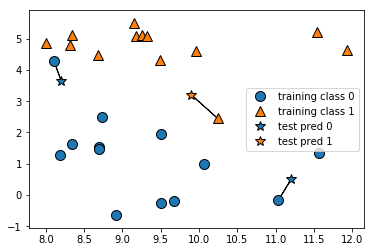

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

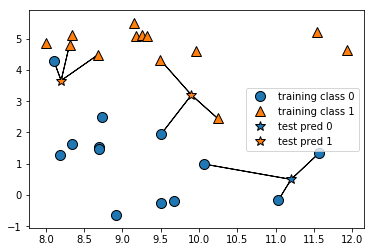

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

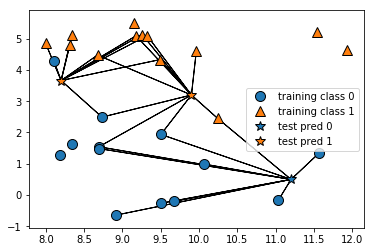

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=10)

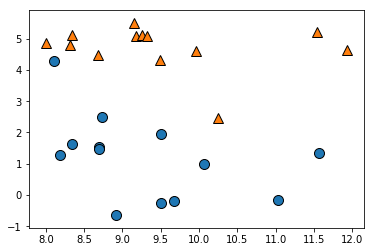

In [5]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
print(X.shape)
print(y.shape)

(26, 2)
(26,)


In [8]:
print(X_test.shape)
print(y_test.shape)

(7, 2)
(7,)


In [9]:
print(X_train.shape)
print(y_train.shape)

(19, 2)
(19,)


In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [12]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


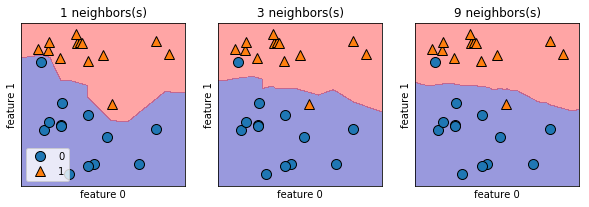

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [15]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

In [16]:
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

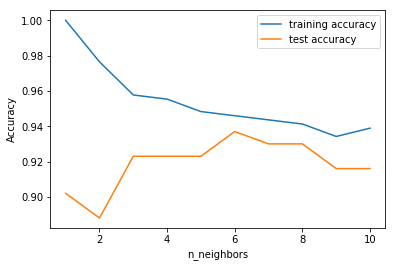

In [17]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

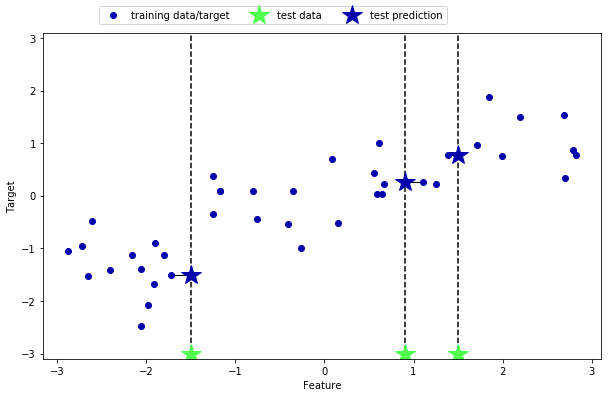

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

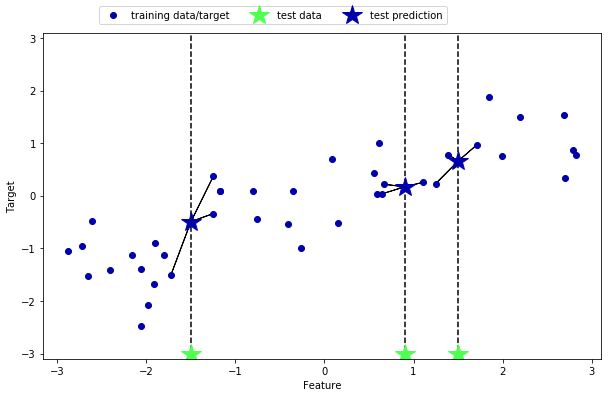

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


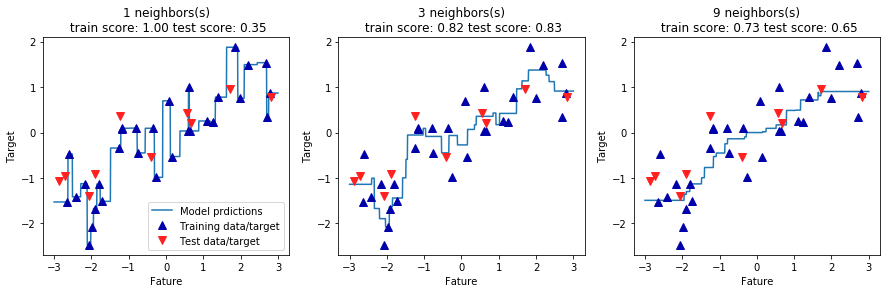

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(n, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Fature")
    ax.set_ylabel("Target")

axes[0].legend(["Model prdictions", "Training data/target", "Test data/target"], loc="best")